##  `Standerd Importants`

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import pathlib
import numpy as np
import splitfolders
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow_hub as hub
from tensorflow.keras import layers
from keras.applications import VGG16

## `Walking Through Files`

In [2]:
# How Many Images iN Each Folder
import os

# walk through the folder
for dirpath , dirnames , filenames in os.walk("Downloads/Concrete Crack Images for Classification/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Downloads/Concrete Crack Images for Classification/'.
There are 0 directories and 20000 images in 'Downloads/Concrete Crack Images for Classification/Negative'.
There are 0 directories and 20000 images in 'Downloads/Concrete Crack Images for Classification/Positive'.


## `Data's Classes`

In [3]:
data_dir = pathlib.Path("Cracks/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['Negative' 'Positive']


## `Visualiziation Random Images From Data Set`

In [4]:
def View_Random_Image (target_dir , target_class):
  target_folder = target_dir +"/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img  = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f" The Image Shape Is {img.shape}")

 The Image Shape Is (227, 227, 3)


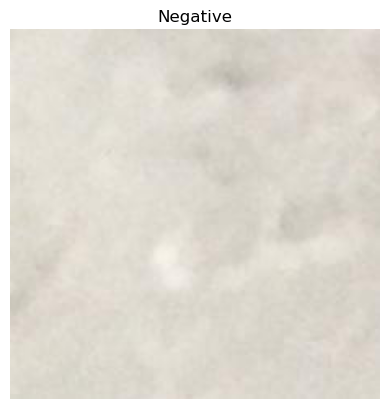

In [5]:
View_Random_Image("Cracks/train/" ,'Negative' )

 The Image Shape Is (227, 227, 3)


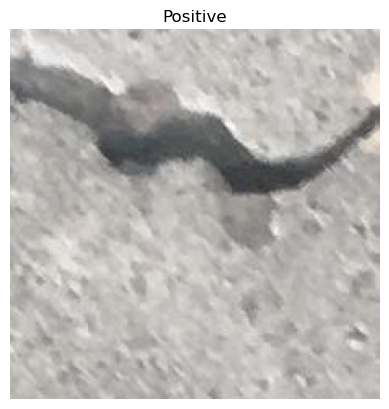

In [6]:
View_Random_Image("Cracks/train/" ,'Positive' )

## `Train & Test Data Generation `

In [7]:
Image_Size = (227,227,3)

In [8]:
Train_Data_Generation = ImageDataGenerator(rescale= 1.0 / 255 ,
                                           horizontal_flip=True,
                                           zoom_range=0.2,
                                           shear_range=0.2 )
Test_Data_Generation = ImageDataGenerator(rescale= 1.0 / 255 ,
                                          horizontal_flip=True,
                                          zoom_range=0.2,
                                          shear_range=0.2 )

## `Train & Test Directions`

In [9]:
Train_Path = "Cracks/val/"
Test_Path = "Cracks/test/"

In [10]:
Train_Data = Train_Data_Generation.flow_from_directory(directory= Train_Path ,
                                                       target_size=(227 ,227) ,
                                                       class_mode="binary" ,
                                                       batch_size=32 ,
                                                       seed=42)
Test_Data = Test_Data_Generation.flow_from_directory(directory= Test_Path ,
                                                       target_size=(227 ,227) ,
                                                       class_mode="binary" ,
                                                       batch_size=32 ,
                                                       seed=42 )

Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## Frist Model `VGG 16 ` `Transfer learning "Feature Extraction"`

In [27]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=Image_Size)

In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras import models, layers, optimizers

In [30]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [32]:
conv_base.trainable = False

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        Train_Path,
        # All images will be resized to 150x150
        target_size=(227, 227),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        Test_Path,
        target_size=(227, 227),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

## `VGG 16 Training`

In [36]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Epoch 1/10
50/50 [==============================] - 315s 6s/step - loss: 0.7720 - acc: 0.8460 - val_loss: 0.0441 - val_acc: 0.9840
Epoch 2/10
50/50 [==============================] - 300s 6s/step - loss: 0.1857 - acc: 0.9550 - val_loss: 0.0309 - val_acc: 0.9910
Epoch 3/10
50/50 [==============================] - 306s 6s/step - loss: 0.1666 - acc: 0.9670 - val_loss: 0.0513 - val_acc: 0.9820
Epoch 4/10
50/50 [==============================] - 299s 6s/step - loss: 0.1250 - acc: 0.9580 - val_loss: 0.0251 - val_acc: 0.9920
Epoch 5/10
50/50 [==============================] - 300s 6s/step - loss: 0.0665 - acc: 0.9780 - val_loss: 0.0197 - val_acc: 0.9960
Epoch 6/10
50/50 [==============================] - 295s 6s/step - loss: 0.1174 - acc: 0.9630 - val_loss: 0.0307 - val_acc: 0.9910
Epoch 7/10
50/50 [==============================] - 1005s 20s/step - loss: 0.0861 - acc: 0.9720 - val_loss: 0.0129 - val_acc: 0.9940
Epoch 8/10
50/50 [==============================] - 294s 6s/step - loss: 0.1262 -

## Model's Preformance "VGG 16"

In [55]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["acc"]
  val_accuracy = history.history["val_acc"]

  epochs = range(len(history.history["loss"]))

  ## plotting loss
  plt.plot(epochs , loss , label = "Traning Loss")
  plt.plot(epochs , val_loss , label = "val_loss")
  plt.title("Losses")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()
   
  ## plotting accuracy
  plt.plot(epochs , accuracy , label = "Traning Accuracy")
  plt.plot(epochs , val_accuracy , label = "Val Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

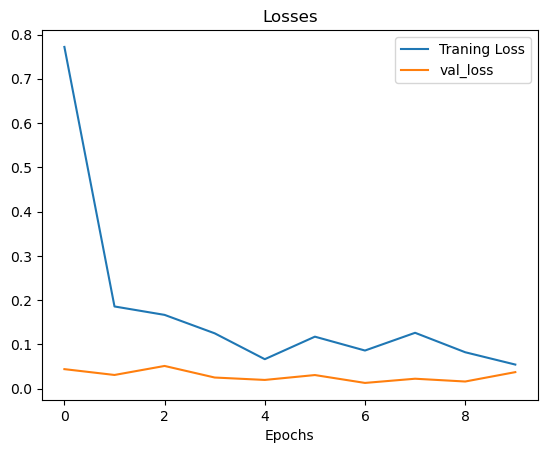

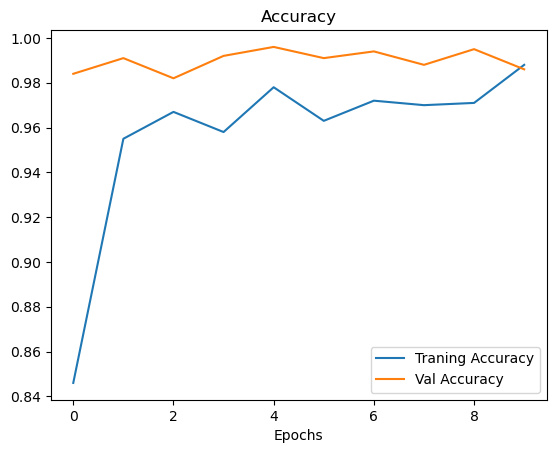

In [56]:
plot_loss_curves(history)

## Model Saving To Be Used In Real Time

In [57]:
model.save("vgg16.h5")

## `CNN Model `"From Scratch"

In [12]:
Model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=30 ,
                           kernel_size=3 ,
                           padding="valid",
                           activation="relu" ,
                           input_shape=(227,227,3)),
    tf.keras.layers.Conv2D(filters=30 ,
                           kernel_size=3 ,
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=30 ,
                           kernel_size=3 ,
                           activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=30 ,
                           kernel_size=3 ,
                           padding="valid",
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=30 , 
                           kernel_size=3 , 
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=30 ,
                           kernel_size=3 ,
                           activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=30 ,
                           kernel_size=3 ,
                           padding="valid",
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=30 , 
                           kernel_size=3 , 
                           activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1 ,activation="sigmoid")
                                 ])

In [13]:
Model_1.compile(optimizer=tf.keras.optimizers.Adam(), loss="binary_crossentropy" , metrics=["accuracy"])

In [14]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 30)      840       
                                                                 
 conv2d_1 (Conv2D)           (None, 223, 223, 30)      8130      
                                                                 
 conv2d_2 (Conv2D)           (None, 221, 221, 30)      8130      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 30)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 30)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 30)        8130      
                                                        

## Model Training

In [ ]:
History_1 = Model_1.fit(Train_Data ,
            epochs= 10 ,
            steps_per_epoch=len(Train_Data) ,
            validation_data=Test_Data ,
            validation_steps=len(Test_Data) )

Epoch 1/10
125/125 [==============================] - 843s 7s/step - loss: 0.6936 - accuracy: 0.4952 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 840s 7s/step - loss: 0.5326 - accuracy: 0.7150 - val_loss: 0.4047 - val_accuracy: 0.9620
Epoch 3/10
 38/125 [========>.....................] - ETA: 7:28 - loss: 0.2411 - accuracy: 0.9441

## Model's Preformance

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  ## plotting loss
  plt.plot(epochs , loss , label = "Traning Loss")
  plt.plot(epochs , val_loss , label = "val_loss")
  plt.title("Losses")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()
   
  ## plotting accuracy
  plt.plot(epochs , accuracy , label = "Traning Accuracy")
  plt.plot(epochs , val_accuracy , label = "Val Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

In [ ]:
plot_loss_curves(history=History_1)

In [ ]:
Model_1.save("Newscratch.h5")

## model predictions

In [ ]:
Model_1.predict(Test_Data)

In [ ]:
Model_1.evaluate(Test_Data)